# Isingモデルの実装

In [2]:
import os
#from numpy.random import *
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

スピンの方向を決める関数

ここでは周期的境界条件を考える。

In [111]:
def spin(model, T):
    x, y = np.random.randint(0,N), np.random.randint(0,N)
    energy = 0.0
    spin = model[x, y]
    for dx, dy in [(-1,0), (1,0), (0,-1), (0,1)]:
        next_x = (x + dx) % N
        next_y = (y + dy) % N
        energy += model[next_x, next_y]
    #変化前のエネルギー
    energy = energy * (-1) * spin
    #変化後のエネルギーとの差
    energy *= (-2)
    if energy < 0:
        model[x, y] = spin * (-1)
    else:
        p = np.exp(-energy/T)
        if np.random.rand() < p:
            model[x, y] = spin * (-1)
    return model

初期条件と温度を決めた後、$10^6$回ほど回してみる！

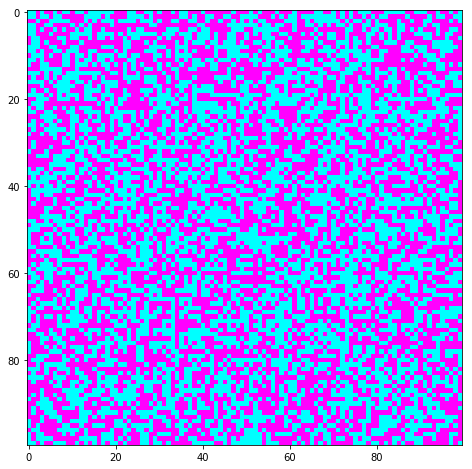

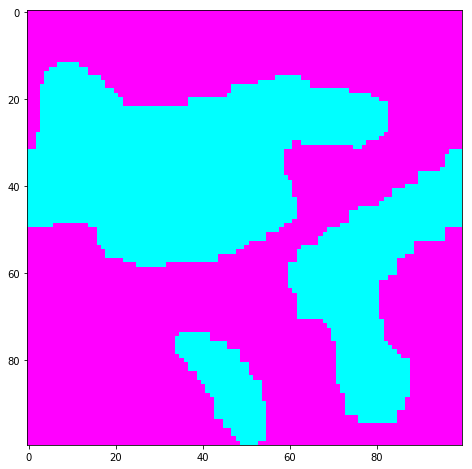

In [163]:
initial_state = 2 * np.random.randint(0,2,(N,N)) - 1
plt.figure(figsize=(8,8))
plt.imshow(initial_state, cmap = "cool")
ising_model = initial_state
for i in range(10**6):
    ising_model= spin(ising_model, 0.5)
plt.figure(figsize=(8,8))
plt.imshow(ising_model, cmap = "cool")